# Perfoming EDA 

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import warnings
warnings.filterwarnings('ignore')

## Loading the data files

In [2]:
movies = pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings = pd.read_csv("ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [4]:
movies.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [6]:
ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


## Checking for null values

In [8]:
# checking for null values
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [9]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [10]:
movies.shape

(10329, 3)

In [11]:
ratings.shape

(105339, 4)

## Merging the ratings with the movies

In [12]:
df=pd.merge(ratings,movies, how='left',on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


## Grouping the movie title and top 20 ratings

In [27]:
df1=df.groupby(['title'])[['rating']].sum()
high_rated=df1.nlargest(20,'rating')
high_rated.head()

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5


In [30]:
df2 = df.groupby(['title'])[['rating']].count()
top_20_rated=df2.nlargest(20,'rating')
print(top_20_rated.head())
df2

                                  rating
title                                   
Pulp Fiction (1994)                  325
Forrest Gump (1994)                  311
Shawshank Redemption, The (1994)     308
Jurassic Park (1993)                 294
Silence of the Lambs, The (1991)     290


,rating
title,
'71 (2014),1
'Hellboy': The Seeds of Creation (2004),1
'Round Midnight (1986),1
'Til There Was You (1997),3
"'burbs, The (1989)",20
...,...
loudQUIETloud: A Film About the Pixies (2006),1
xXx (2002),24
xXx: State of the Union (2005),7


## Visualizing the top 20 movies

<BarContainer object of 20 artists>

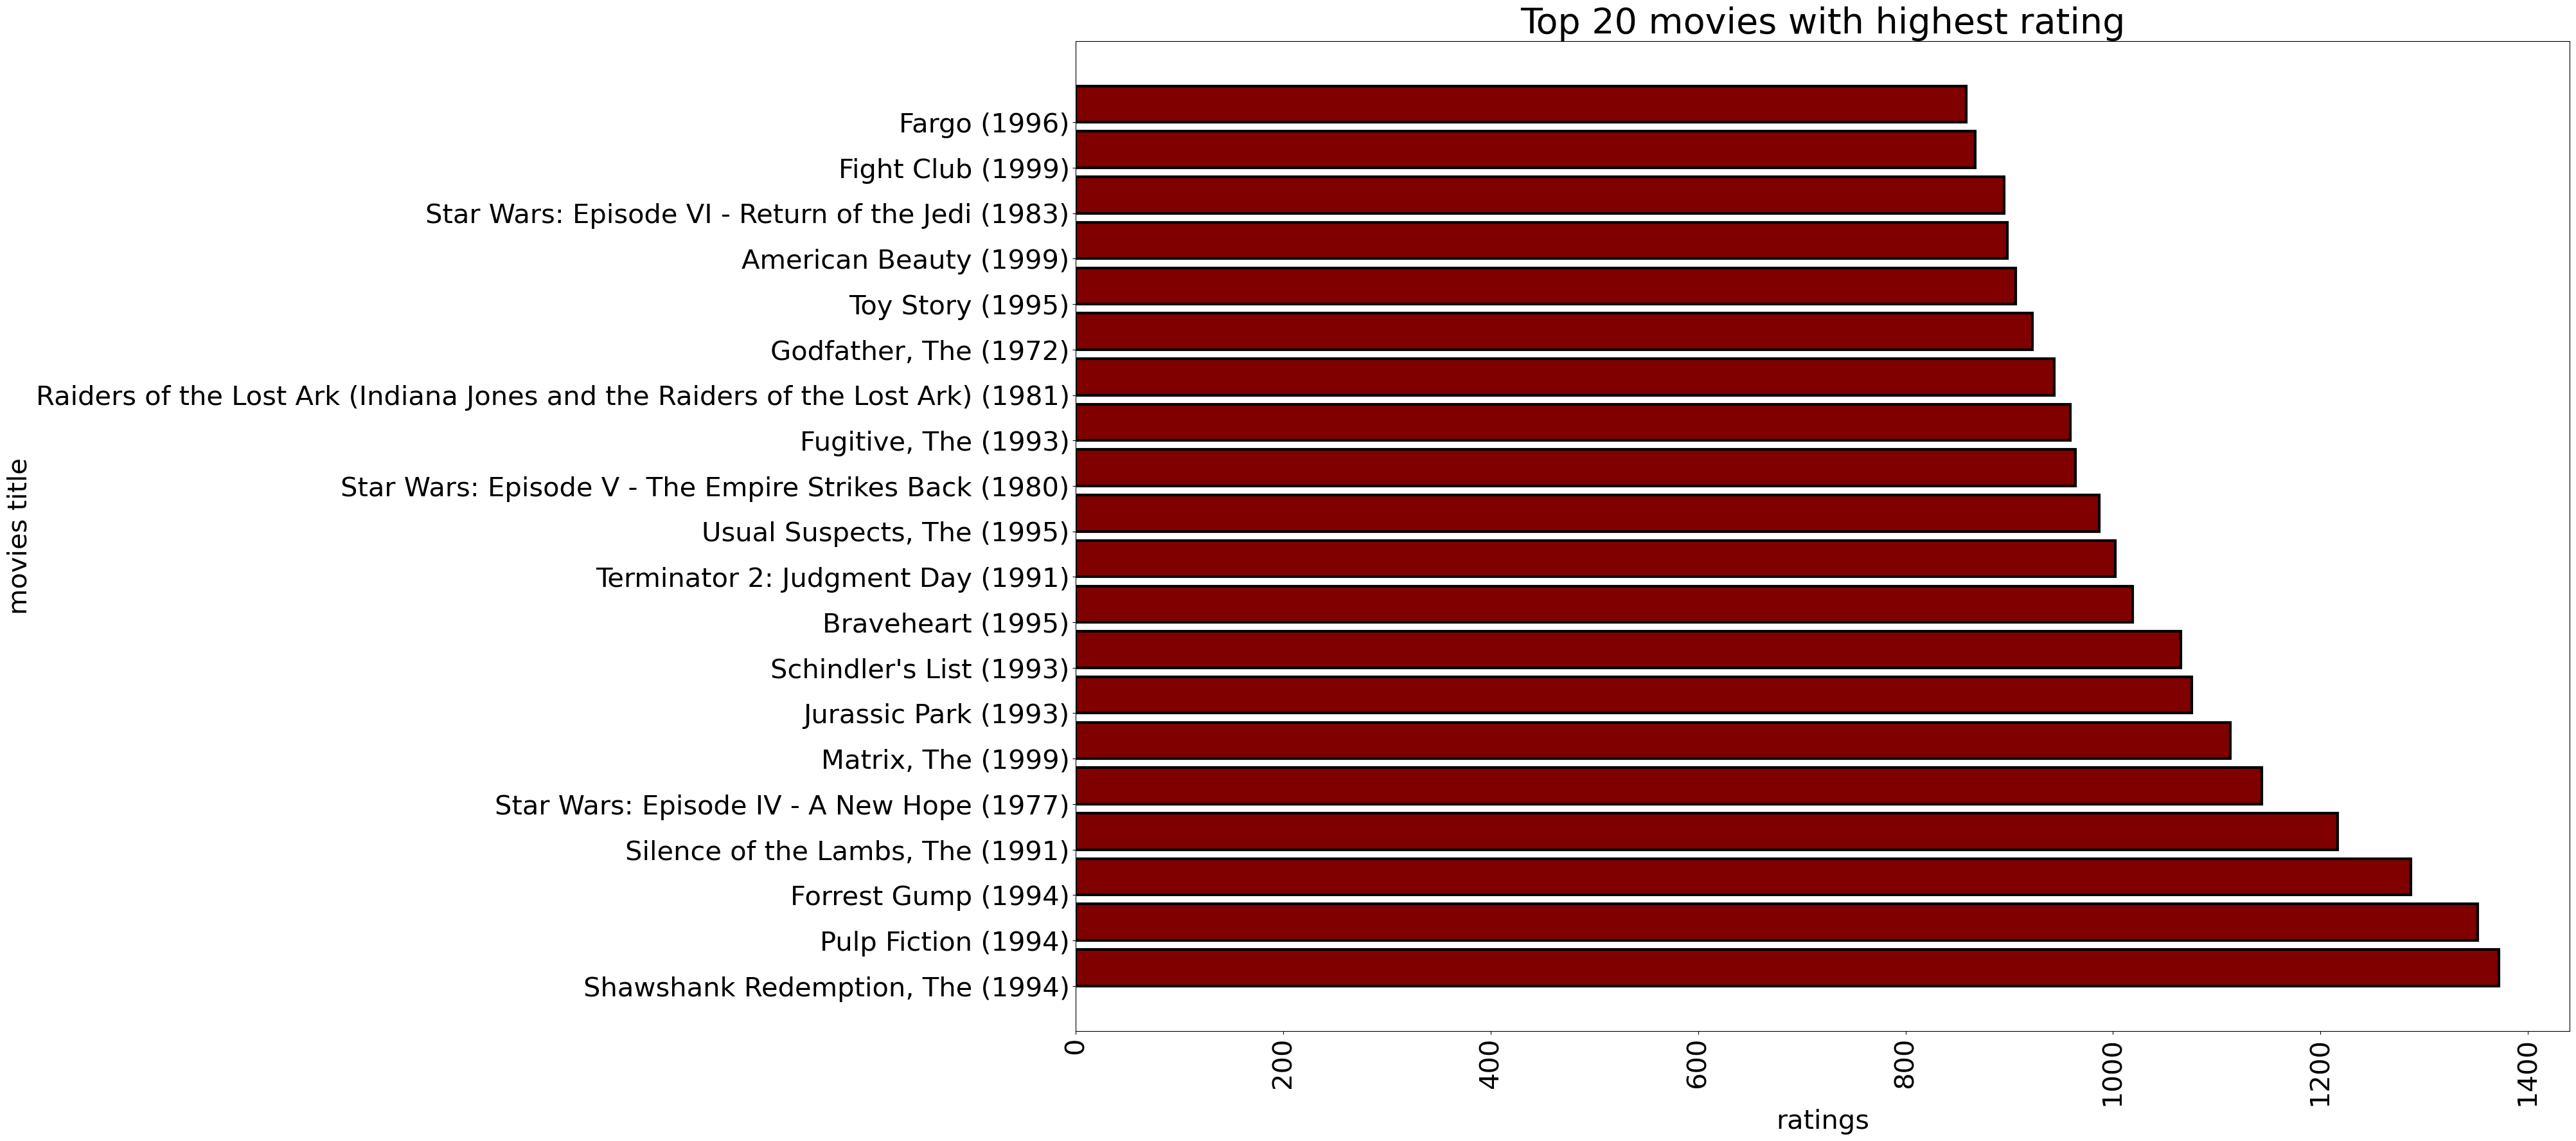

In [15]:
plt.figure(figsize=(30,20))
plt.title('Top 20 movies with highest rating',fontsize=40)
plt.ylabel('movies title',fontsize=30)
plt.xticks(fontsize=30,rotation=90)
plt.xlabel('ratings',fontsize=30)
plt.yticks(fontsize=30)
plt.barh(high_rated.index,high_rated['rating'],linewidth=3,edgecolor='black',color='maroon',align = 'edge')

## Ratings based on user_id

In [16]:
moviemat = df.pivot_table(index = 'userId', columns='title', values = 'rating')
moviemat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Movie Recommendation for a similar movie

In [17]:
similar_movie_rating =moviemat['Shawshank Redemption, The (1994)']
similar_movie_rating

userId
1      4.0
2      NaN
3      NaN
4      4.0
5      NaN
      ... 
664    NaN
665    4.5
666    5.0
667    NaN
668    4.0
Name: Shawshank Redemption, The (1994), Length: 668, dtype: float64

## Movie correlation

In [18]:
similar_to_Shawshank = moviemat.corrwith(similar_movie_rating)
similar_to_Shawshank

title
'71 (2014)                                            NaN
'Hellboy': The Seeds of Creation (2004)               NaN
'Round Midnight (1986)                                NaN
'Til There Was You (1997)                             NaN
'burbs, The (1989)                               0.328524
                                                   ...   
loudQUIETloud: A Film About the Pixies (2006)         NaN
xXx (2002)                                      -0.343495
xXx: State of the Union (2005)                  -0.116264
¡Three Amigos! (1986)                            0.461180
À nous la liberté (Freedom for Us) (1931)             NaN
Length: 10323, dtype: float64

In [19]:
corr_to_Shawshank = pd.DataFrame(similar_to_Shawshank, columns=['Correlation'])
corr_to_Shawshank

,Correlation
title,
'71 (2014),NaN
'Hellboy': The Seeds of Creation (2004),NaN
'Round Midnight (1986),NaN
'Til There Was You (1997),NaN
"'burbs, The (1989)",0.328524
...,...
loudQUIETloud: A Film About the Pixies (2006),NaN
xXx (2002),-0.343495
xXx: State of the Union (2005),-0.116264


## dropping the null values

In [20]:
corr_to_Shawshank.dropna(inplace=True)
corr_to_Shawshank.shape

(5185, 1)

## recomendation for 'Shawshank Redemption, The (1994)' 

In [25]:
corr_to_Shawshank.sort_values(by='Correlation', ascending=False).head(15)


,Correlation
title,
Music Box (1989),1.0
"Art of the Steal, The (2009)",1.0
Next Friday (2000),1.0
Nicholas Nickleby (2002),1.0
"Bridge of San Luis Rey, The (2004)",1.0
Gonzo: The Life and Work of Dr. Hunter S. Thompson (2008),1.0
Friday the 13th Part VIII: Jason Takes Manhattan (1989),1.0
"Invisible, The (2007)",1.0
"Flower of My Secret, The (La flor de mi secreto) (1995)",1.0
